<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica4_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### __Data set de vinos del mundo__

Esta es una versión reducida de la base de datos [winemag-data](https://gist.github.com/clairehq/79acab35be50eaf1c383948ed3fd1129), que contiene una reseña en inglés sobre una gran cantidad de vinos del mundo.

### __Descripción de los campos__

 - **country**: El país de donde proviene el vino
 - **description** : Algunas frases de un sommelier que describen el sabor, olor, apariencia, sensación, etc. del vino.
 - **designation**: La denominación. El viñedo dentro de la bodega de donde proceden las uvas que elaboraron el vino.
 - **points**: la cantidad de puntos que WineEnthusiast calificó al vino en una escala del 1 al 100 (aunque dicen que solo publican reseñas de vinos con una puntuación> = 80).
 - **price**: El costo de una botella de vino.
 - **province**: La provincia o estado de donde proviene el vino
 - **region_1**: el área de cultivo de vino en una provincia o estado (es decir, Napa)
 - **region_2**: a veces hay regiones más específicas, especificadas dentro de un área de cultivo del vino (es decir, Rutherford dentro del Valle de Napa), pero este valor a veces puede estar en blanco.
 - **taster_name**: nombre de la persona que probó y revisó el vino.
 - **taster_twitter_handle**: identificador de Twitter para la persona que probó y revisó el vino.
 - **title**: el título de la reseña de vinos, que a menudo contiene la cosecha si está interesado en extraer esa característica.
 - **variety**: la variedad: el tipo de uva utilizada para elaborar el vino (es decir, Pinot Noir).
 - **winery**: la bodega que hizo el vino.

### TEST

In [3]:
# Fetch the dataset using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/DCDPUAEM/DCDP/main/01%20Programaci%C3%B3n%20en%20Python/data/winemag-data-less.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.2M  100 23.2M    0     0  11.8M      0  0:00:01  0:00:01 --:--:-- 11.8M


In [4]:
# leemos el dataframe usando read_csv
df = pd.read_csv("winemag-data-less.csv")
print(df.info())
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59995 non-null  int64  
 1   country                59964 non-null  object 
 2   description            59995 non-null  object 
 3   designation            42728 non-null  object 
 4   points                 59995 non-null  int64  
 5   price                  55750 non-null  float64
 6   province               59964 non-null  object 
 7   region_1               50163 non-null  object 
 8   region_2               23068 non-null  object 
 9   taster_name            47586 non-null  object 
 10  taster_twitter_handle  45381 non-null  object 
 11  title                  59995 non-null  object 
 12  variety                59995 non-null  object 
 13  winery                 59995 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 6.4+

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


In [5]:
#Tiremos la columna Unnamed
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm


### __Veamos cuantas reseñas de vinos mexicanos tenemos.__

#### &#9758; Construye una nueva Tabla con las reseñas de vinos mexicanos.
- Quédate **sólo** con las siguientes columnas: `['country','winery','variety','description','points','price']`
- Haz que el índice se reinicie en 0.
- Guarda este DataFrame en la variable vinosMX.

In [6]:


"""
SECUENCIA:
1. Ubicar todos los registros de México usando indexación booleana
2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
3. Reiniciar el índice usando reset_index()
4. Tirar (drop) la nueva columna index
5. Asignar el resultado de este proceso a la variable vinosMX
"""
# TU CODIGO
# 1. Ubicar todos los registros de México usando indexación booleana
vinosMX = df[df['country']=='Mexico']

# 2. De este DataFrame resultante, extraer solamente las columnas solicitadas.
vinosMX = vinosMX[['country','winery','variety','description','points','price']]

# 3. Reiniciar el índice usando reset_index()
vinosMX = vinosMX.reset_index()

# 4. Tirar (drop) la nueva columna index
vinosMX = vinosMX.drop('index',axis=1)
vinosMX

,country,winery,variety,description,points,price
0,Mexico,L.A. Cetto,Nebbiolo,"The color is appropriately light, the aromas a...",88,18.0
1,Mexico,Monte Xanic,Sauvignon Blanc,"Sauvignon Blanc is, in general, one of Baja's ...",87,15.0
2,Mexico,L.A. Cetto,Cabernet Sauvignon,"Aromas of mature Cabernet: cassis, tobacco lea...",87,18.0
3,Mexico,Cava Aragon,Nebbiolo,"While this is fiery on the nose, you also get ...",88,27.0
4,Mexico,L.A. Cetto,Petite Sirah,"Dark and earthy, slightly pruny and alcoholic,...",83,8.0
5,Mexico,Hacienda La Lomita,Rosé,Oxidized cherry and strawberry aromas settle o...,83,21.0
6,Mexico,Monte Xanic,Cabernet Franc,"With aromas of salsa, chili peppers and tomato...",86,39.0
7,Mexico,Tres Valles,Sauvignon Blanc,Mild hints of tropical fruit are less than con...,84,15.0
8,Mexico,Unión de Productores del Valle (UPVG),Red Blend,"This odd blend of Barbera, Cabernet Sauvignon,...",83,22.0
9,Mexico,Monte Xanic,Red Blend,This Cabernet blend is one of Baja's best reds...,90,56.0


### __Veamos cuantas reseñas de vinos por país tenemos.__

#### &#9758; Muestra en una gráfica de barras la distribución del número de reseñas por país (_top 10_).

#### Puedes auxiliarte con alguna de estos métodos de Pandas:
 - [pandas.DataFrame.count](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html)
 - [pandas.Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
 - [pandas.Series.index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.index.html)
 - [pandas.Series.values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.values.html)

<ipython-input-7-3236eb0cf6a6>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x[:10], y=y[:10], palette="hls")


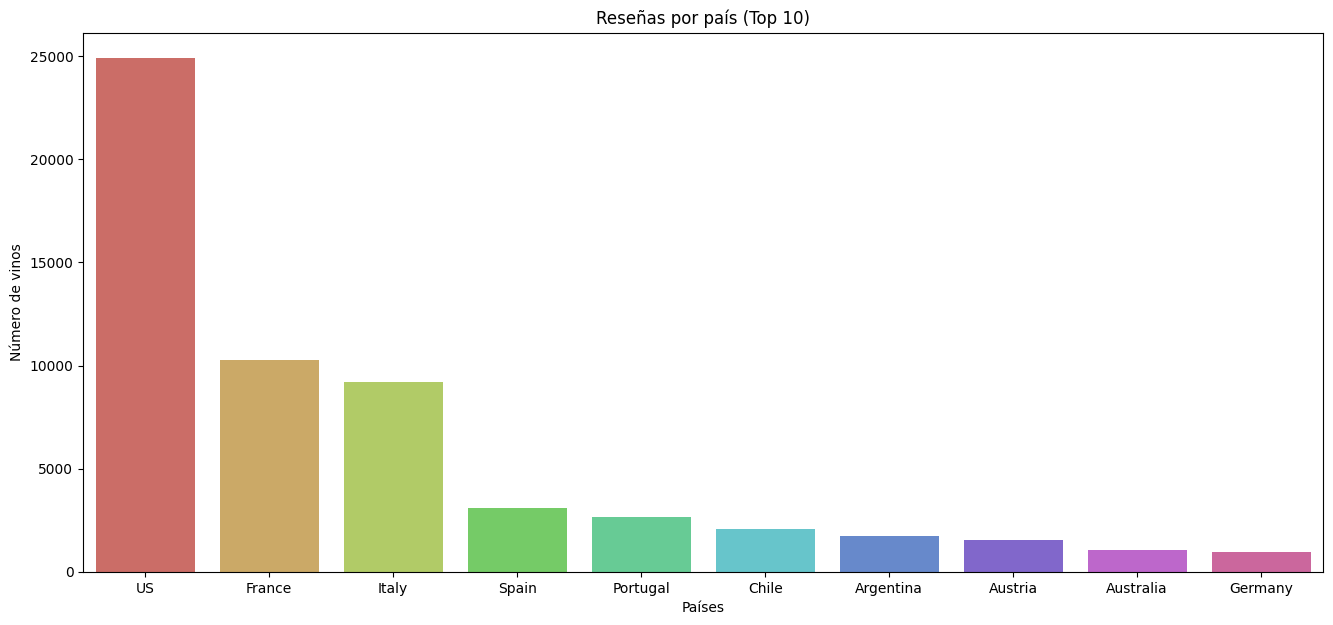

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
SECUENCIA:
1. Ubicar el nombre de la columna de país
2. Sobre esta columna, obtener la Serie correspondiente
3. Hacer un conteo de los valores únicos sobre esta Serie

4. X en la gráfica de barras son los países (índice de la Serie)
5. Y en la gráfica de barras son los conteos por país (values de la Serie)
6. Usar Seaborn para graficar el diagrama de barras
7. Rotular la gráfica y los ejes
"""
# 1. Ubicar el nombre de la columna de país
# 2. Sobre esta columna, obtener la Serie correspondiente
# 3. Hacer un conteo de los valores únicos sobre esta Serie
conteos=df.country.value_counts()

# 4. X en la gráfica de barras son los países (índice de la Serie)
# 5. Y en la gráfica de barras son los conteos por país (values de la Serie)
x = conteos.index
y = conteos.values

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

plt.figure(figsize=(16,7))
sns.barplot(x=x[:10], y=y[:10], palette="hls")
# En una sola línea:
#sns.barplot(df.country.value_counts().index[:10], df.country.value_counts().values[:10])

plt.xlabel("Países")
plt.ylabel("Número de vinos")
plt.title("Reseñas por país (Top 10)")

plt.show()

### __Veamos ahora cuál es el precio promedio por cada país.__

#### &#9758; Muestra en una gráfica de barras el precio promedio por país, en orden descendente (_top 10_).

Puedes consultar:
 - [pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### &#9758; ¿Cuál sería el precio promedio por variedad?

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

<ipython-input-8-201a1b8d7570>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette="hls")


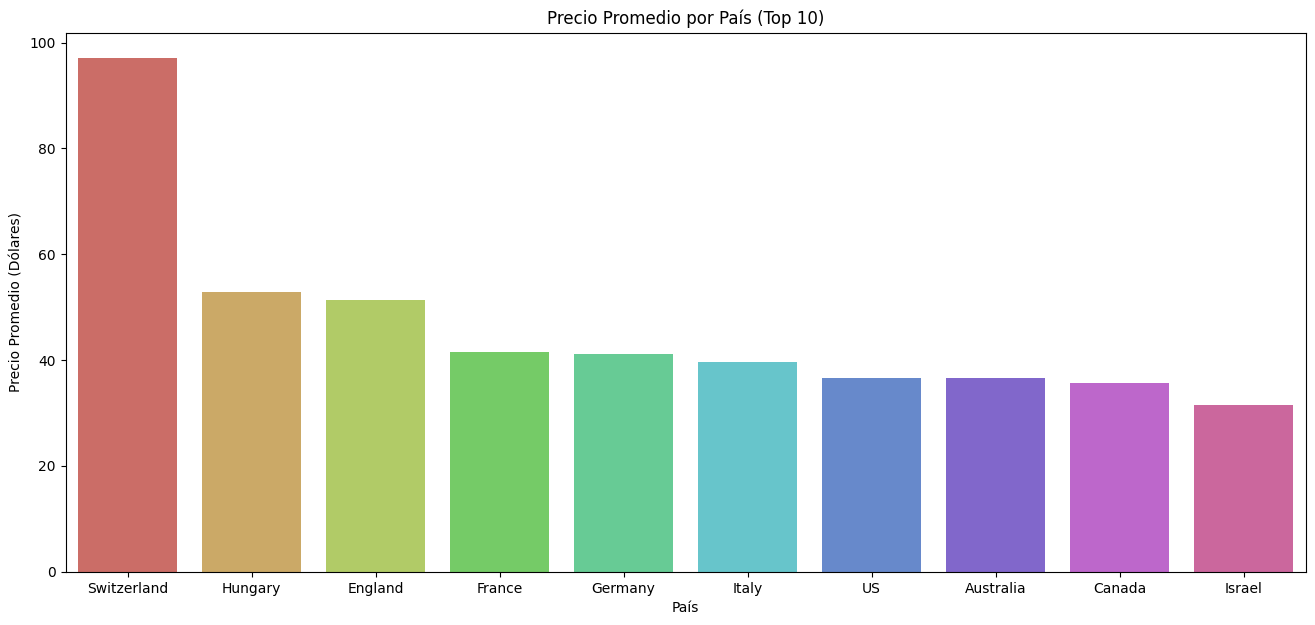

variety
Abouriou       75.000000
Agiorgitiko    24.343750
Aglianico      39.071429
Aidani         27.000000
Airen           8.500000
                 ...    
Zinfandel      30.066182
Zlahtina       13.000000
Zweigelt       22.680556
Çalkarası      19.000000
Žilavka        15.000000
Name: price, Length: 580, dtype: float64


In [8]:
"""
SECUENCIA:
obtener el promedio de los precios por pais
ordenar los promedios de mayor a menor
mostrar el top 10
"""
promedios = df.groupby('country')['price'].mean()
orden_promedios=promedios.sort_values(ascending=False)
top10 = orden_promedios.head(10)




plt.figure(figsize=(16,7))
sns.barplot(x=top10.index, y=top10.values, palette="hls")
plt.xlabel('País')
plt.ylabel('Precio Promedio (Dólares)')
plt.title('Precio Promedio por País (Top 10)')
plt.show()



# precio promedio por variedad
precio_por_variedad = df.groupby('variety')['price'].mean()
print(precio_por_variedad)



#### Agregando anotaciones a nuestros gráficos

Es posible agregar información a nuestros gráficos, en forma de texto, o dibujos (e.g. flechas, líneas, círculos, etc.). Para ello, se utiliza la anotación (annotate) de ejes (axes). Detallar aquí cómo funciona nos llevaría mucho tiempo. Puedes consultar la documentación en estas ligas:

- [matplotlib.Artist](https://matplotlib.org/3.3.3/api/artist_api.html#matplotlib.artist.Artist)
    - [Artist tutorial](https://matplotlib.org/3.3.3/tutorials/intermediate/artists.html)
- [matplotlib.axes](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Patch](https://matplotlib.org/3.3.3/api/axes_api.html#matplotlib.axes.Axes)
- [matplotlib.patches.Rectangle](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Rectangle.html)
- [matplotlib.pyplot.annotate](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.annotate.html)

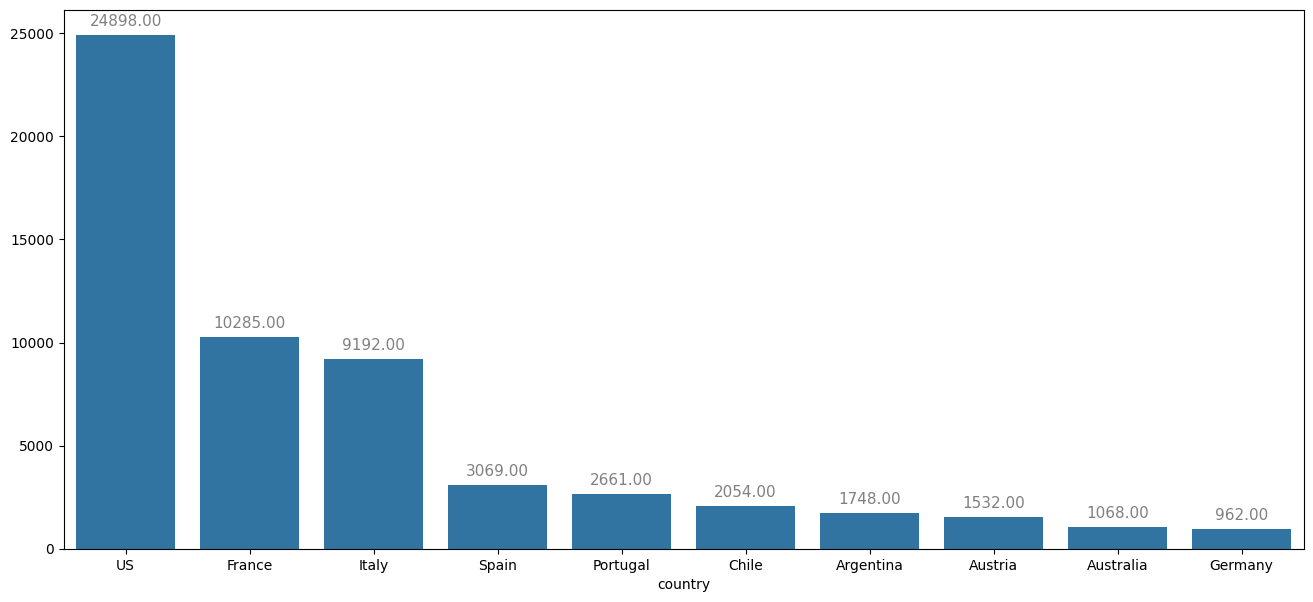

In [9]:
#Definimos el tamaño del canvas
plt.figure(figsize=(16,7))

# la variable "ax" (axes) contiene la información  del gráfico de barras.
# En particular, contiene todo lo relativo a los parches (rectángulos) del barplot.
ax = sns.barplot(x=x[:10], y=y[:10])

# Recorremos cada rectángulo
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),\
                (p.get_x() + p.get_width() / 2., p.get_height()),\
                ha='center', va='center', fontsize=11, color='gray',\
                xytext=(0, 10),\
                textcoords='offset points')

plt.show()

### __Ahora queremos darnos una idea de cuáles podrían ser los países cuyos vinos tienen una mejor razón calidad-precio en promedio.__

#### &#9758; Muestra en una gráfica de barras la razón puntos/precio promedio por país, en orden descendente (_top 10_). Muestra los valores de la razón sobre cada barra.

✋ __Recuerda que si divides entre 0 o Nan obtendrás inf o nan__

🙂 __Escribe la secuencia de pasos que tendrías que realizar.__

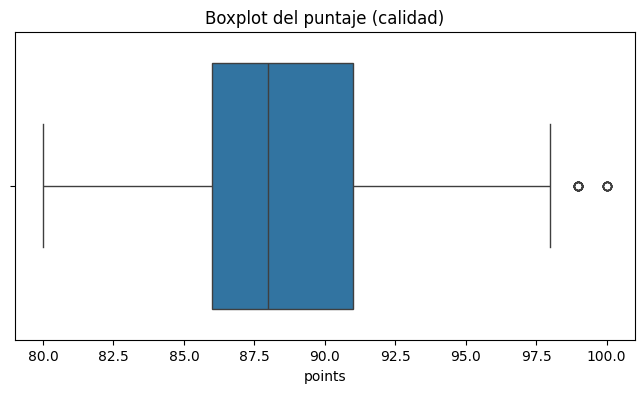

In [10]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df.points)
plt.title("Boxplot del puntaje (calidad)")
plt.show()

<ipython-input-11-b46944b03e61>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  promedios = df.groupby('country').apply(lambda x: x['points'].mean() / x['price'].mean())


<Figure size 1000x500 with 0 Axes>

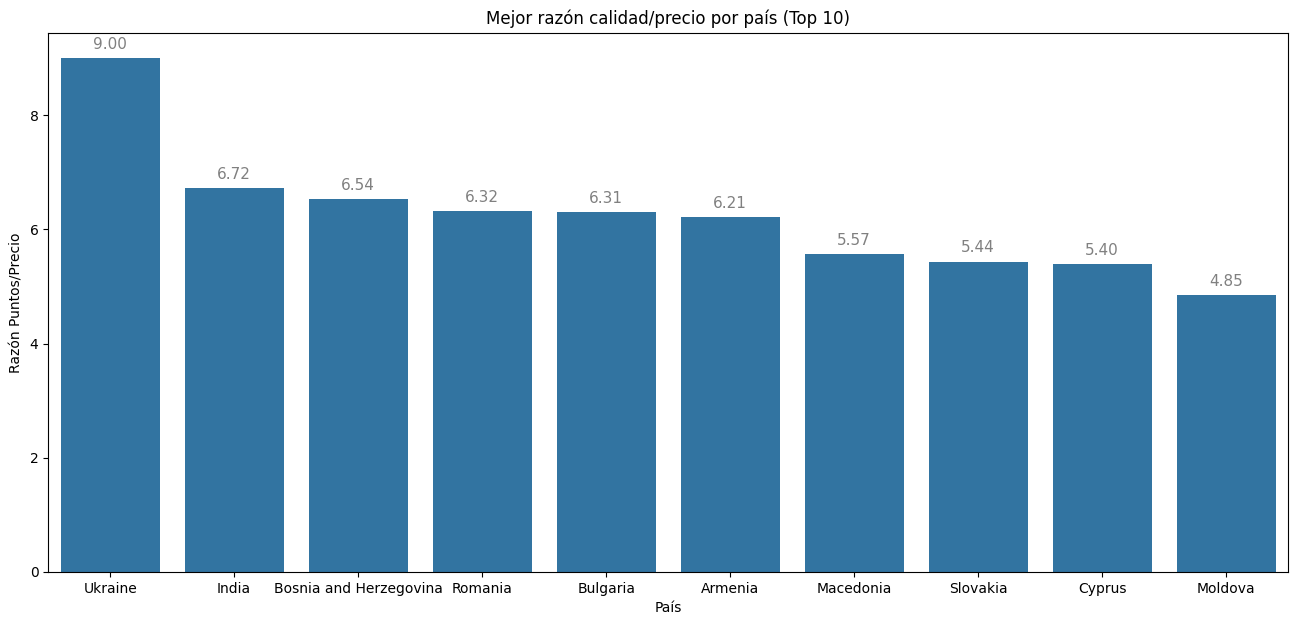

In [11]:
"""
SECUENCIA:
calcular ña razon puntos/ precio por pais
Ordenar los resultados en orden descendentes
de esos datos solo quedarnos con el top10
grafucar con barras y que contenga los valores de la razon en cada barra
"""
plt.figure(figsize=(10,5))

### TU CODIGO AQUI ##
promedios = df.groupby('country').apply(lambda x: x['points'].mean() / x['price'].mean())
promedios = promedios.sort_values(ascending=False)
top_10_paises = promedios.head(10)


#######Para la grafica##############

plt.figure(figsize=(16, 7))
ax = sns.barplot(x=top_10_paises.index, y=top_10_paises.values)
plt.title("Mejor razón calidad/precio por país (Top 10)")
plt.xlabel("País")
plt.ylabel("Razón Puntos/Precio")
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 10),
                 textcoords='offset points')
plt.show()




### __¿Qué vinos tienen la mejor puntuación y a qué países pertenecen?__

#### &#9758; Muestra en una gráfica de pastel la proporción de los países que tienen los 20 mejores vinos; es decir, los primeros 20 de mayor puntaje.  

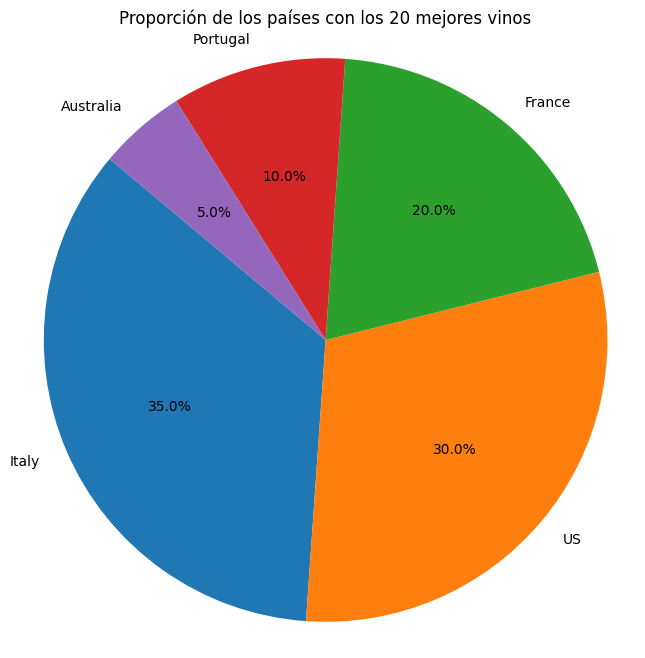

In [12]:
#TU CODIGO
m20_vinos = df.nlargest(20, 'points')
#m20_vinos.head(3)
pais_m20_vinos = m20_vinos['country']
#pais_m20_vinos.head(3)
que_paises_top = pais_m20_vinos.value_counts()


plt.figure(figsize=(8, 8))
plt.pie(que_paises_top, labels=que_paises_top.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de los países con los 20 mejores vinos')
plt.axis('equal')
plt.show()




### __¿Cuáles son las 10 variedades de uva más abundantes y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [13]:
#TU CODIGO
variedades = df['variety'].head(10)
variedades

,variety
0,White Blend
1,Portuguese Red
2,Pinot Gris
3,Riesling
4,Pinot Noir
5,Tempranillo-Merlot
6,Frappato
7,Gewürztraminer
8,Gewürztraminer
9,Pinot Gris


### __¿Cuáles son las 20 bodegas más mencionadas y en qué proporción?__

#### &#9758; Da una solución utilizando sólo dos líneas de código

In [14]:
#TU CODIGO
bodegas = df['winery'].value_counts().head(20)
bodegas

,count
winery,
Georges Duboeuf,109
Wines & Winemakers,107
Testarossa,97
Louis Latour,87
DFJ Vinhos,86
Williams Selyem,86
Chateau Ste. Michelle,86
Concha y Toro,78
Gary Farrell,74


### __Vamos ahora a construir una nueva tabla de información__

#### &#9758; Construye una tabla que muestre país, variedad de uva, bodega, y valores de puntuación y precio.
- Considera las 10 variedades de uva y las 20 bodegas más importantes.
- Haz una tabla con estos datos y sólo los valores de país, bodega, variedad, puntuación y precio correspondientes.
- Agrega una columna con el valor de puntos/precio
- Cambia el nombre de la bodega para que éste incluya su país de origen.
- Ordena los datos por nombre de país, variedad y bodega (orden ascendente).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59995 entries, 0 to 59994
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                59964 non-null  object 
 1   description            59995 non-null  object 
 2   designation            42728 non-null  object 
 3   points                 59995 non-null  int64  
 4   price                  55750 non-null  float64
 5   province               59964 non-null  object 
 6   region_1               50163 non-null  object 
 7   region_2               23068 non-null  object 
 8   taster_name            47586 non-null  object 
 9   taster_twitter_handle  45381 non-null  object 
 10  title                  59995 non-null  object 
 11  variety                59995 non-null  object 
 12  winery                 59995 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 6.0+ MB


In [ ]:
variedad2= df['variety'].value_counts().head(10).index.tolist()
bodegas = df['winery'].value_counts().head(20).index.tolist()
filtro_df = df[df['variety'].isin(variedad2) & df['winery'].isin(bodegas)]
filtro_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 145 to 59809
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                998 non-null    object 
 1   description            999 non-null    object 
 2   designation            844 non-null    object 
 3   points                 999 non-null    int64  
 4   price                  950 non-null    float64
 5   province               998 non-null    object 
 6   region_1               867 non-null    object 
 7   region_2               626 non-null    object 
 8   taster_name            712 non-null    object 
 9   taster_twitter_handle  712 non-null    object 
 10  title                  999 non-null    object 
 11  variety                999 non-null    object 
 12  winery                 999 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 109.3+ KB


In [15]:
#TU CODIGO
variedad2= df['variety'].value_counts().head(10).index.tolist()
bodegas = df['winery'].value_counts().head(20).index.tolist()
filtro_df = df[df['variety'].isin(variedad2) & df['winery'].isin(bodegas)] #solo se cumple para las que estan en variedad y bodegas

columnas =  ['country', 'winery','variety', 'points', 'price']
filtro_columnas= filtro_df[columnas]
filtro_df['points/price']=filtro_df['points']/filtro_df['price']
filtro_df['winery'] = filtro_df['country'] + ' - ' + filtro_df['winery']
#filtro_df['winery'] = filtro_df['country']  + filtro_df['winery']
filtro_df = filtro_df.sort_values(by=['country', 'variety', 'winery'], ascending=True)
p_v = filtro_df.copy()
p_v.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 2141 to 26489
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                998 non-null    object 
 1   description            999 non-null    object 
 2   designation            844 non-null    object 
 3   points                 999 non-null    int64  
 4   price                  950 non-null    float64
 5   province               998 non-null    object 
 6   region_1               867 non-null    object 
 7   region_2               626 non-null    object 
 8   taster_name            712 non-null    object 
 9   taster_twitter_handle  712 non-null    object 
 10  title                  999 non-null    object 
 11  variety                999 non-null    object 
 12  winery                 998 non-null    object 
 13  points/price           950 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 117.1+ K

<ipython-input-15-26299a762864>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_df['points/price']=filtro_df['points']/filtro_df['price']
<ipython-input-15-26299a762864>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro_df['winery'] = filtro_df['country'] + ' - ' + filtro_df['winery']


In [17]:
#solo para ver que se cumpla
filtro_df.head(3)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,points/price
2141,Argentina,Grassy stalky berry aromas lean towards green....,Oak Cask,84,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2014 Oak Cask Cabernet Sauvignon (Men...,Cabernet Sauvignon,Argentina - Trapiche,8.400000
3056,Argentina,Loamy berry aromas smell a bit like wet clay a...,Broquel,88,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2014 Broquel Cabernet Sauvignon (Mend...,Cabernet Sauvignon,Argentina - Trapiche,5.866667
15948,Argentina,"Spice, licorice and herbal notes complement re...",Broquel,90,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2012 Broquel Cabernet Sauvignon (Mend...,Cabernet Sauvignon,Argentina - Trapiche,6.000000


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### &#9758; Observa la relación puntos-precio por país

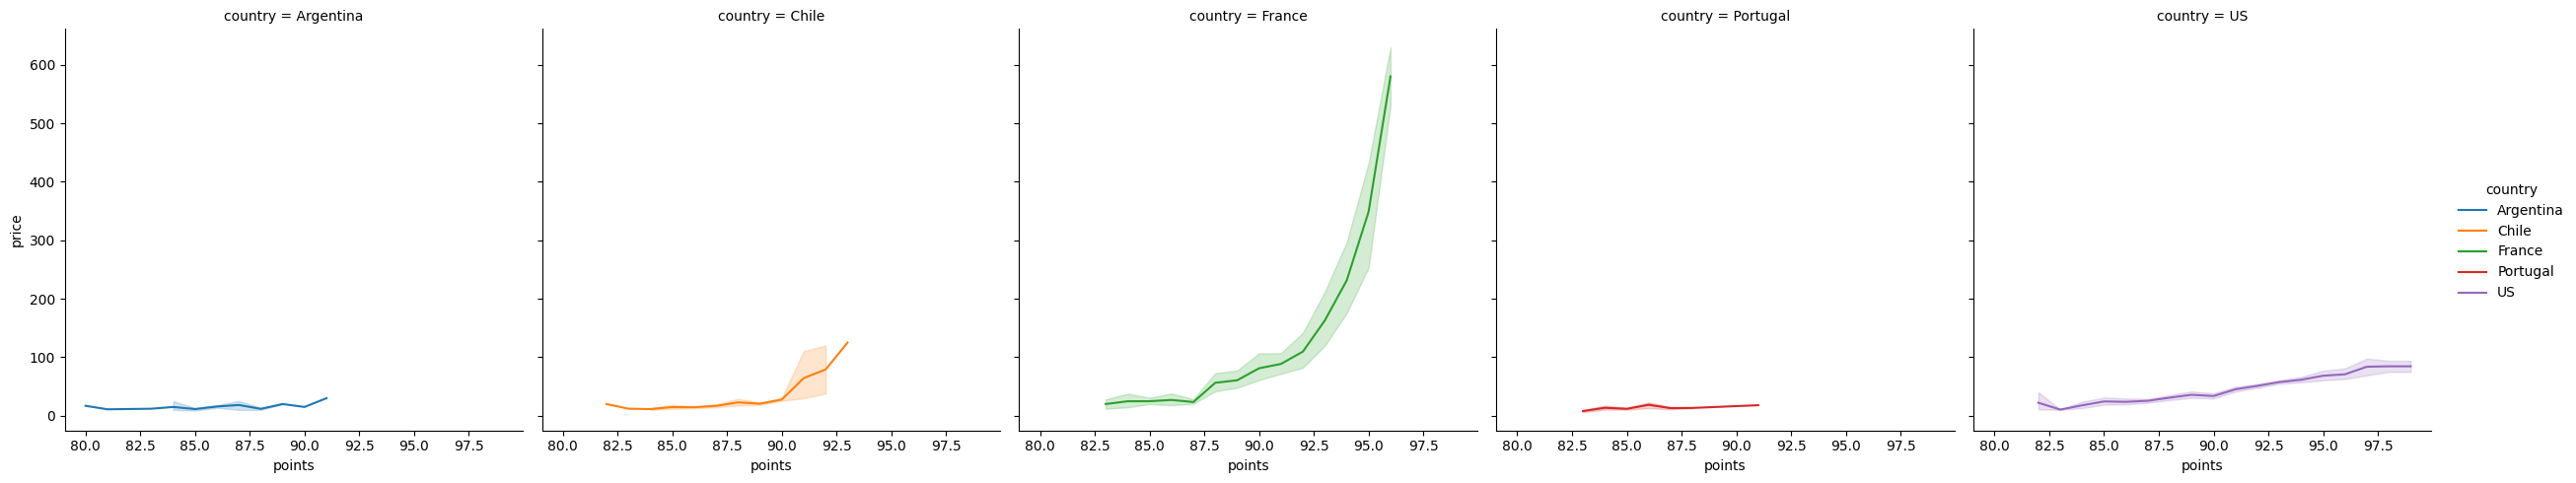

In [ ]:
sns.relplot(x="points", y="price", hue="country", col='country',kind="line", data=p_v)

#### &#9758; Observa las distribuciones por pares en función de la variedad de uva.

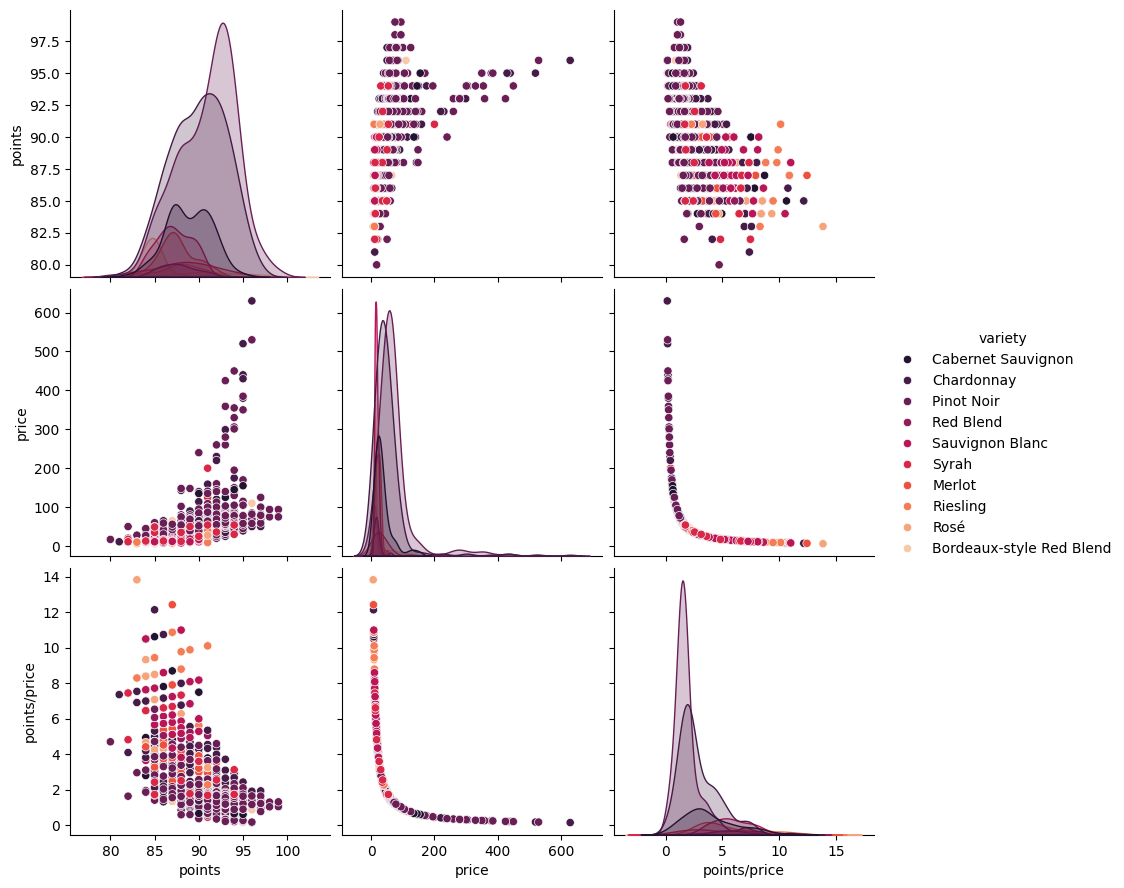

In [ ]:
sns.pairplot(p_v, hue="variety",height=3,palette='rocket')

#### &#9758; Observa las distribuciones por pares en función del país.

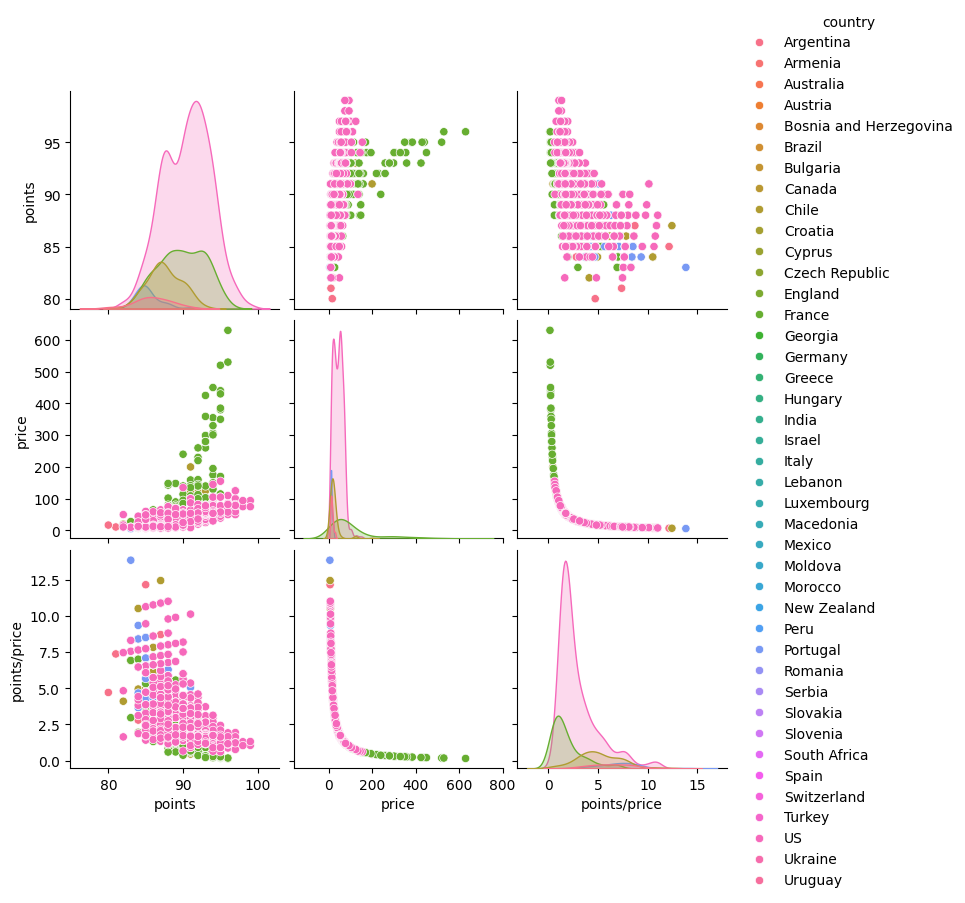

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue='country' )

#### &#9758; Observa las distribuciones por pares en función de la bodega.

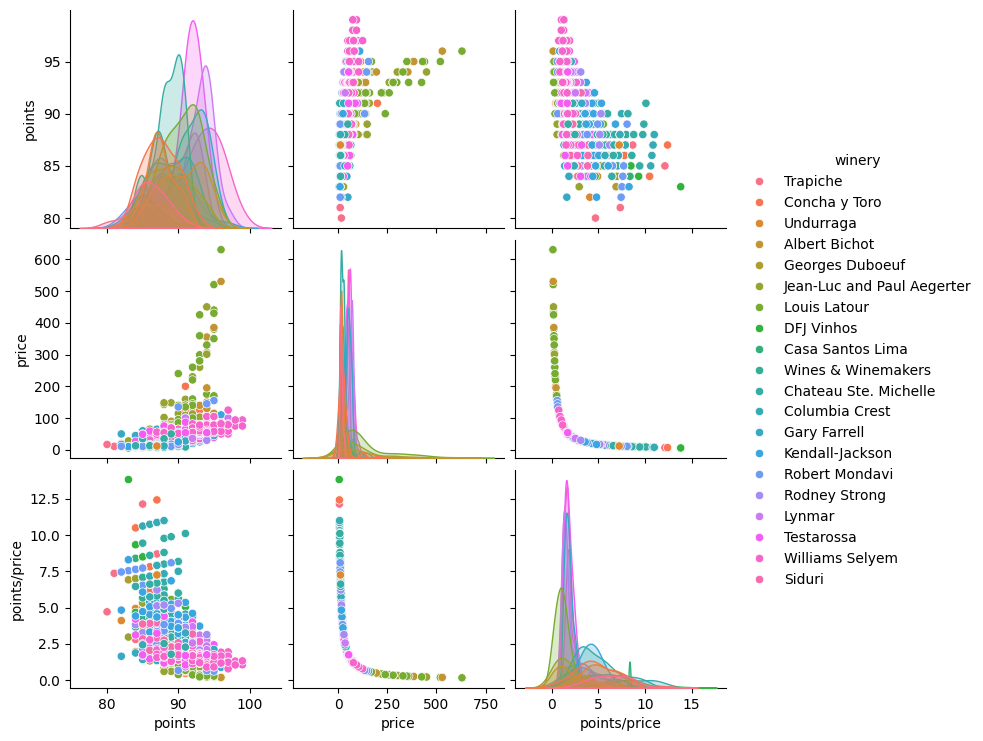

In [ ]:
#TU CODIGO
sns.pairplot(p_v, hue='winery' )

#### &#9758; Observa las distribuciones (scatter) de precio por variedad de uva.

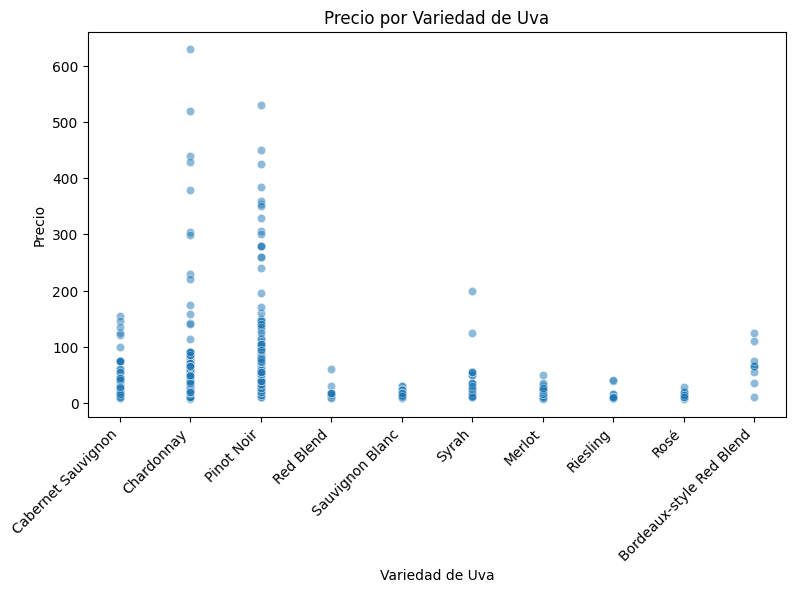

In [ ]:
#TU CODIGO
plt.figure(figsize=(9, 5))
sns.scatterplot(data=p_v, x='variety', y='price', alpha=0.5)
plt.xlabel('Variedad de Uva')
plt.ylabel('Precio')
plt.title('Precio por Variedad de Uva')
plt.xticks(rotation=45, ha='right')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precio por bodega.

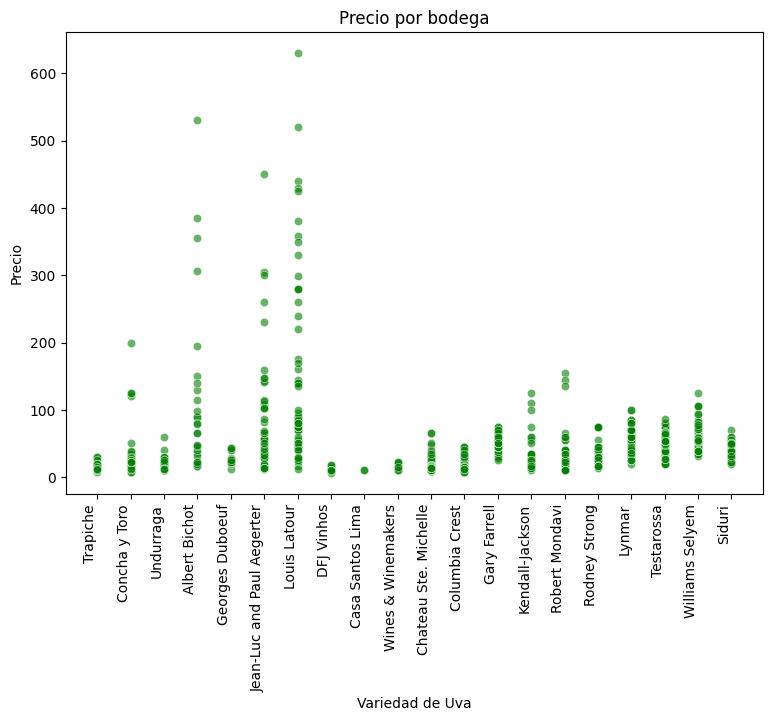

In [ ]:
#TU CODIGO
plt.figure(figsize=(9, 6))
sns.scatterplot(data=p_v, x='winery', y='price', alpha=0.6, color= 'green')
plt.xlabel('Variedad de Uva')
plt.ylabel('Precio')
plt.title('Precio por bodega')
plt.xticks(rotation=90, ha='right')
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.

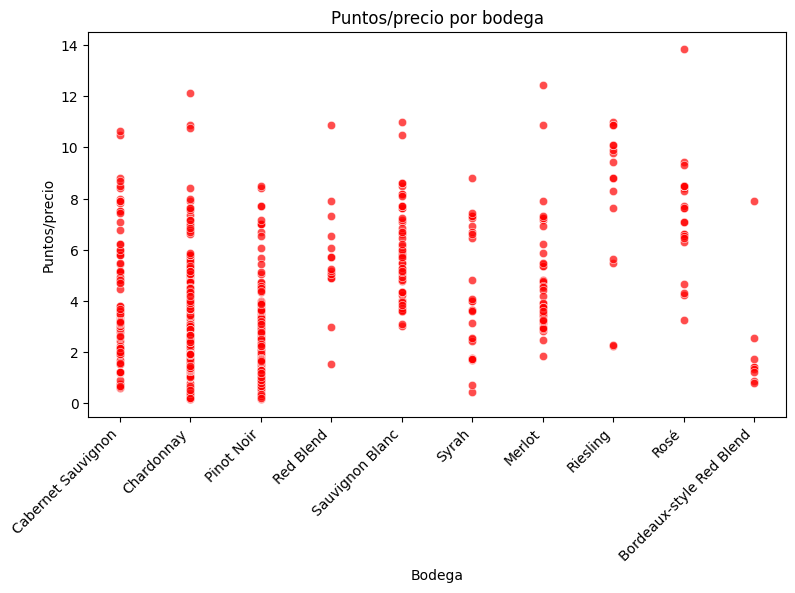

In [ ]:
#TU CODIGO
plt.figure(figsize=(9, 5))
sns.scatterplot(data=p_v, x='variety', y='points/price', alpha=0.7, color= 'red')
plt.xlabel('Bodega')
plt.ylabel('Puntos/precio')
plt.title('Puntos/precio por bodega')
plt.xticks(rotation=45, ha='right')
plt.show()

#### &#9758; Observa las distribuciones (scatter) de puntos/precio por país.

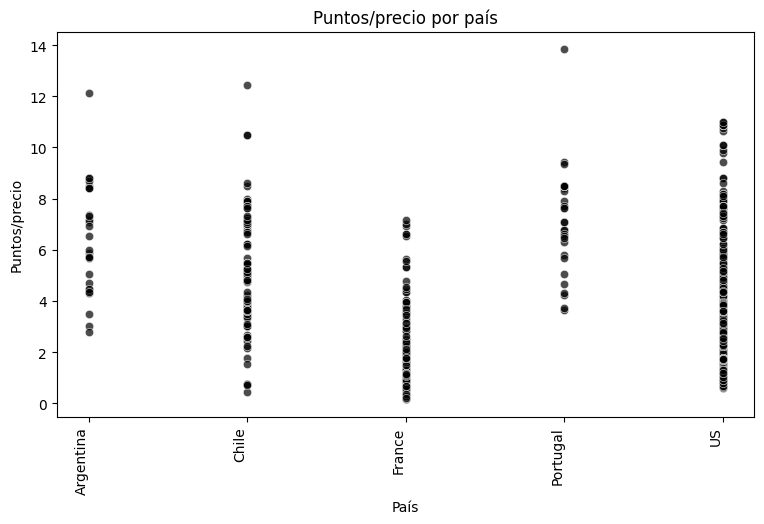

In [ ]:
#TU CODIGO
plt.figure(figsize=(9, 5))
sns.scatterplot(data=p_v, x='country', y='points/price', alpha=0.7, color= 'black')
plt.xlabel('País')
plt.ylabel('Puntos/precio')
plt.title('Puntos/precio por país')
plt.xticks(rotation=90, ha='right')
plt.show()

### __Agrega los datos de México a esta última tabla de información__

#### &#9758; Une la tabla de vinosMX a la tabla p_v
- Asegúrate de __no agregar__ la columna de descripción

In [40]:
#TU CODIGO/
# renombrar la columna 'bodega' en 'vinosMX'
vinosMX = vinosMX.rename(columns={'bodega': 'winery'})
# Eliminar la columna de descripción si existe en 'vinosMX'
if 'description' in vinosMX.columns: #usando drop
    vinosMX = vinosMX.drop(columns=['description'])
# une las tablas utilizando la columna 'country'
df3 = pd.merge(p_v, vinosMX, on='country', how='outer')

#en pantalla
print(df3)


        country                                        description  \
0     Argentina  Grassy stalky berry aromas lean towards green....   
1     Argentina  Loamy berry aromas smell a bit like wet clay a...   
2     Argentina  Spice, licorice and herbal notes complement re...   
3     Argentina  Cherry, plum, bacon and licorice are all good ...   
4     Argentina  Minerally, earthy aromas of plum and blackberr...   
...         ...                                                ...   
1024         US  Overly sweet and simple, and something of a di...   
1025         US  This is a big wine that's not ready now—it's t...   
1026         US  A great Syrah, from a winery better known for ...   
1027         US  Testarossa is better known for Pinot Noir, but...   
1028        NaN  Balanced aromas of green herbs and citrus zest...   

            designation  points_x  price_x          province  \
0              Oak Cask      84.0     10.0  Mendoza Province   
1               Broquel      88

#### &#9758; Calcula los valores de points/price para los vinos de México
- TIP: Usa el método apply sobre `df3[['points','price','points/price']]`

In [28]:
# TU CODIGO
#solo extraer los de Mexico
vinos_mexico = df3[df3['country'] == 'Mexico']
#para points/price
vinos_mexico['points/price']=vinos_mexico['points_y']/vinos_mexico['price_y']
vinos_mexico['points/price'] #solo para visualizar

<ipython-input-28-8ff9f62fee36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vinos_mexico['points/price']=vinos_mexico['points_y']/vinos_mexico['price_y']


,points/price
334,4.888889
335,5.800000
336,4.833333
337,3.259259
338,10.375000
339,3.952381
340,2.205128
341,5.600000
342,3.772727
343,1.607143


In [29]:
#Para darle un mejor formato
print(vinos_mexico[['country', 'winery_y','variety_y','points_y', 'price_y', 'points/price']])

    country                               winery_y  \
334  Mexico                             L.A. Cetto   
335  Mexico                            Monte Xanic   
336  Mexico                             L.A. Cetto   
337  Mexico                            Cava Aragon   
338  Mexico                             L.A. Cetto   
339  Mexico                     Hacienda La Lomita   
340  Mexico                            Monte Xanic   
341  Mexico                            Tres Valles   
342  Mexico  Unión de Productores del Valle (UPVG)   
343  Mexico                            Monte Xanic   
344  Mexico                   Vinicola Fraternidad   
345  Mexico                           Vinos Magbel   
346  Mexico                                Möebius   
347  Mexico                        Vinicola Urbana   
348  Mexico                              Vena Cava   
349  Mexico                            Monte Xanic   
350  Mexico                         Viñas de Garza   
351  Mexico                 

#### &#9758; Observa la relación puntos-precio por país

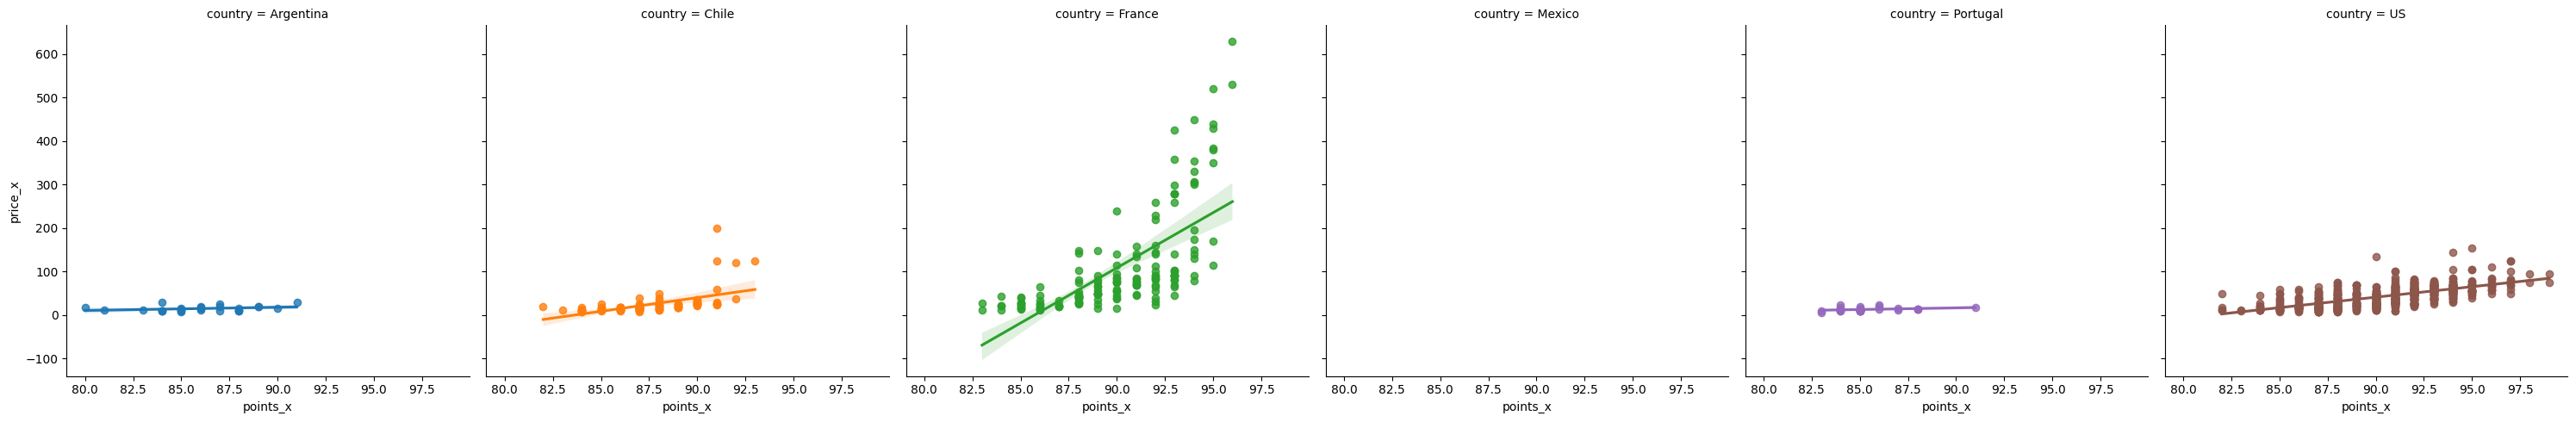

In [33]:
# Crear un gráfico de dispersión con líneas de regresión/ como lo hicimos anteriormente tomando los datos de df3
sns.lmplot(x="points_x", y="price_x", hue="country", col='country', data=df3, scatter_kws={'alpha':0.8})
plt.show()


#### &#9758; Observa las distribuciones por pares en función del país.
- Construye una tabla auxiliar "mx_top", donde los datos de México (en df3) aparezcan al final de la tabla mx_top.

In [50]:
mx_datos = df3[df3['country'] == 'Mexico'] #todas las filas que son de mexico
#mx_top
paises_datos2= df3[df3['country'] != 'Mexico'] #todas las filas que no sean de mexico
#mx_datos2
#concatena los datos de paises_datos2 primero y al ultimo mx_datos, los datos de mexico
mx_top= pd.concat([paises_datos2, mx_datos])
mx_top


,country,description,designation,points_x,price_x,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery_x,points/price,winery_y,variety_y,points_y,price_y
0,Argentina,Grassy stalky berry aromas lean towards green....,Oak Cask,84.0,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2014 Oak Cask Cabernet Sauvignon (Men...,Cabernet Sauvignon,Argentina - Trapiche,8.400000,NaN,NaN,NaN,NaN
1,Argentina,Loamy berry aromas smell a bit like wet clay a...,Broquel,88.0,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2014 Broquel Cabernet Sauvignon (Mend...,Cabernet Sauvignon,Argentina - Trapiche,5.866667,NaN,NaN,NaN,NaN
2,Argentina,"Spice, licorice and herbal notes complement re...",Broquel,90.0,15.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2012 Broquel Cabernet Sauvignon (Mend...,Cabernet Sauvignon,Argentina - Trapiche,6.000000,NaN,NaN,NaN,NaN
3,Argentina,"Cherry, plum, bacon and licorice are all good ...",Oak Cask,88.0,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2009 Oak Cask Cabernet Sauvignon (Men...,Cabernet Sauvignon,Argentina - Trapiche,8.800000,NaN,NaN,NaN,NaN
4,Argentina,"Minerally, earthy aromas of plum and blackberr...",Gran Medalla,91.0,30.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Trapiche 2010 Gran Medalla Cabernet Sauvignon ...,Cabernet Sauvignon,Argentina - Trapiche,3.033333,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viñas de Garza,Red Blend,92.0,54.0
360,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L.A. Cetto,Chardonnay,84.0,10.0
361,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hacienda La Lomita,Sauvignon Blanc-Chenin Blanc,86.0,22.0
362,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,La Lomita,Bordeaux-style Red Blend,88.0,40.0


#### &#9758; Observa las distribuciones (scatter) de puntos por país.

<ipython-input-52-09a4d4916a39>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="country", y="points_x", data=df3, dodge=True, palette='deep', marker='*', size=9)


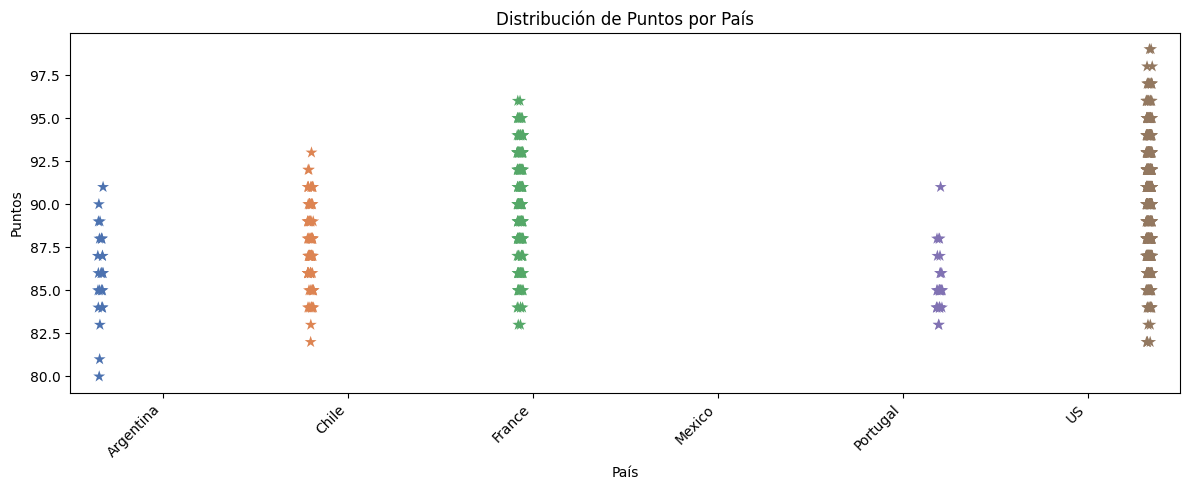

In [52]:
plt.figure(figsize=(12, 5))
sns.stripplot(x="country", y="points_x", data=df3, dodge=True, palette='deep', marker='*', size=9)
plt.xticks(rotation=45, ha="right")
plt.xlabel('País')
plt.ylabel('Puntos')
plt.title('Distribución de Puntos por País')
plt.tight_layout()
plt.show()

#### &#9758; Observa las distribuciones (scatter) de precios por bodega.

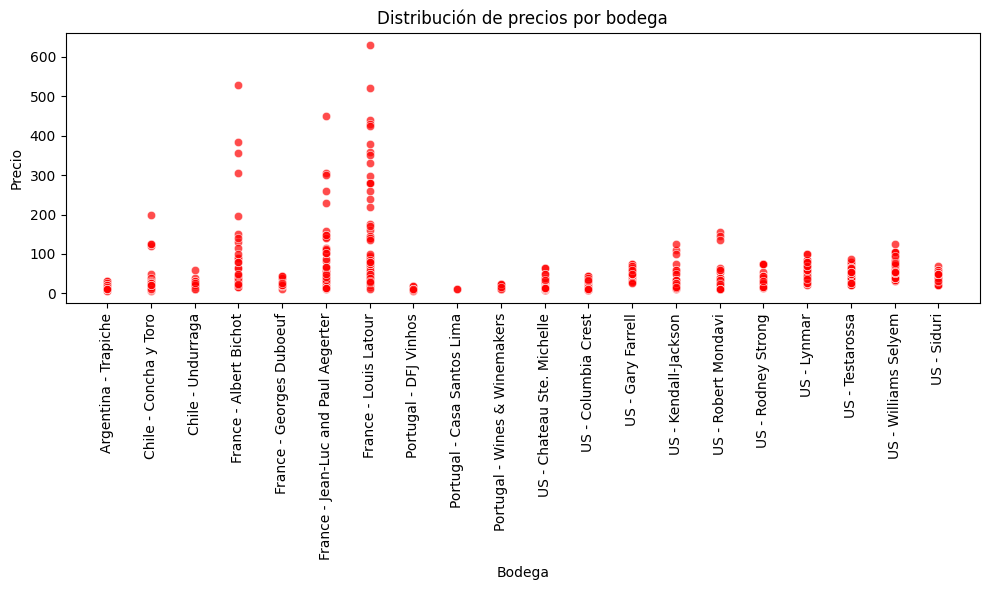

In [63]:
# Crear un gráfico de dispersión de precios por bodega
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mx_top, x='winery_x', y='price_x', alpha=0.7, color ='red')
plt.title('Distribución de precios por bodega')
plt.xlabel('Bodega')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### &#9758; Observa las distribuciones (scatter) de puntos/precio por bodega.
- Dibuja una línea que marque el promedio de todos los datos
- Dibuja marcas ubicadando los valores promedio por cada bodega (TIP: usa `groupby` sobre país y bodega para calcular primero los valores promedio)

In [65]:
promedio= mx_top['points/price'].mean()
promedio

np.float64(3.2214007345966054)

In [78]:
vinos_mejores = mx_top[mx_top['points/price']> promedio]['country']
#cuantos vinos por pais son los que cumplen que sean mejor calidad/precio mayor al promedio
VINOS=vinos_mejores.value_counts()
VINOS



,count
country,
US,189
Chile,82
Portugal,30
Argentina,26
France,26


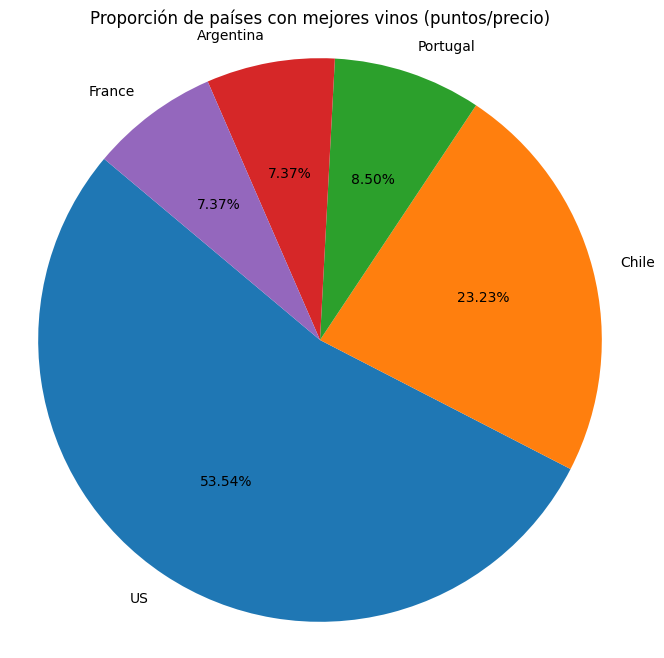

In [99]:
#hacemos el grafico
plt.figure(figsize=(8, 8))
plt.pie(VINOS, labels=VINOS.index, autopct='%1.2f%%', startangle=140)
plt.title('Proporción de países con mejores vinos (puntos/precio)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### &#9758; Si consideramos la proporción de los países con mejor relación puntos/precio, ¿cómo queda México?
- Usa un gráfico de pastel

In [100]:
promedio= mx_top['points/price'].mean()
promedio


np.float64(3.2214007345966054)

In [104]:
vinos_mexico_mejor=(mx_top['country'] == 'Mexico') & (mx_top['points/price'] > promedio)
#visualizar
vinos_mexico_mejor.value_counts()

,count
False,1029


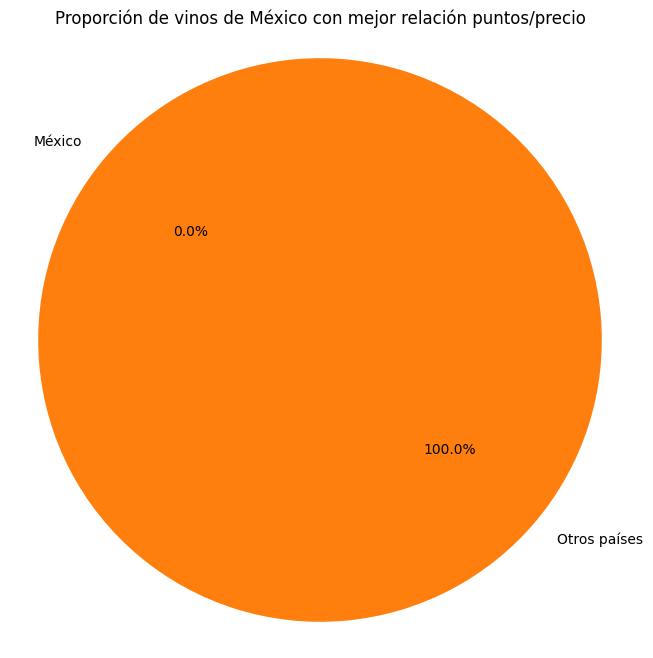

In [118]:
pedazo_mexico= len(mx_top[vinos_mexico_mejor]) / len(mx_top)
#pedazo_mexico

plt.figure(figsize=(8, 8))
plt.pie([pedazo_mexico, 1 - pedazo_mexico], labels=['México', 'Otros países'], autopct='%1.1f%%', startangle=140)
plt.title('Proporción de vinos de México con mejor relación puntos/precio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()